In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Template to Explore Google Removal Requests

### Table of Contents
###### 1. Setup
###### 2. Most frequented Top Level Domains
###### 3. Top copyright infringing Domains
###### 4. Total requests, Removed, Not Removed, Pending
###### 5. Which are the top .ch, .org & .edu copy right infringing sites?
###### 6. Let user search for specific .ch domains in the data. 

## 1. Setup

In [3]:
df = pd.read_csv("CURRENTDATA/domains.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111657904 entries, 0 to 111657903
Data columns (total 6 columns):
Request ID                          int64
Domain                              object
URLs removed                        int64
URLs for which we took no action    int64
URLs pending review                 int64
From Abuser                         bool
dtypes: bool(1), int64(4), object(1)
memory usage: 4.3+ GB


In [5]:
df.head(3)

,Request ID,Domain,URLs removed,URLs for which we took no action,URLs pending review,From Abuser
0,1704321,come.in,1,0,0,False
1,1704321,limetorrents.cc,1,0,0,False
2,1704321,limetorrents.com,1,0,0,False


## 2. Looking into the Most Frequently Mentioned Top Level Domains

In [6]:
df['Domain'][0]

'come.in'

In [7]:
type(df['Domain'][0])

str

In [8]:
test = df['Domain']

In [9]:
df.head()

,Request ID,Domain,URLs removed,URLs for which we took no action,URLs pending review,From Abuser
0,1704321,come.in,1,0,0,False
1,1704321,limetorrents.cc,1,0,0,False
2,1704321,limetorrents.com,1,0,0,False
3,1704321,limetorrents.net,1,0,0,False
4,1704321,rbt.xyz,1,0,0,False


In [10]:
import re
def toplevel_domains(xx):
#Call the first element of the list works fine in the Test version. But as soon as you 
#you work with the large data set it creates error messages. To work aroung them I 
#transfered the func output into a tuple. Somewhere along the line there is a corrupt 
#cell. How can I find it?
    return tuple(re.findall('\..+$', xx)) #[0]

df['Top_Level'] = test.apply(toplevel_domains)

In [11]:
df.head()

,Request ID,Domain,URLs removed,URLs for which we took no action,URLs pending review,From Abuser,Top_Level
0,1704321,come.in,1,0,0,False,"(.in,)"
1,1704321,limetorrents.cc,1,0,0,False,"(.cc,)"
2,1704321,limetorrents.com,1,0,0,False,"(.com,)"
3,1704321,limetorrents.net,1,0,0,False,"(.net,)"
4,1704321,rbt.xyz,1,0,0,False,"(.xyz,)"


In [12]:
domain_frequency = df["Top_Level"].value_counts().sort_values(ascending=True).tail(150)
#top_level = df["Top_Level"].value_counts()
#top_level.sort_values(ascending=True).tail(10).plot(kind='barh')

(.today,)         23822
(.eu.org,)        24680
(.date,)          25211
(.co.ke,)         25421
(.kr,)            26134
(.cm,)            26150
(.reviews,)       26258
(.co.il,)         27443
(.jp,)            27567
(.network,)       27835
(.vg,)            27935
(.host,)          28147
(.cash,)          28153
(.agency,)        28803
(.tt,)            31229
(.ae,)            31938
(.com.pl,)        32460
(.by,)            32467
(.cx,)            32776
(.press,)         32877
(.pt,)            34552
(.guru,)          34660
(.hk,)            35840
(.audio,)         36088
(.pub,)           36400
(.ac,)            37162
(.ec,)            39007
(.world,)         39344
(.st,)            40812
(.gy,)            41111
                 ...   
(.gq,)           515994
(.club,)         552131
(.ml,)           596064
(.tk,)           645817
(.casa,)         658809
(.ws,)           660149
(.click,)        729931
(.se,)           784418
(.website,)      823579
(.pl,)           869285
(.tv,)          

In [25]:
domain_frequency = df.groupby("Domain")["Top_Level"].value_counts().sort_values(ascending=True)

In [26]:
pd.DataFrame(domain_frequency).to_csv('domain_frequency.csv', index=False)

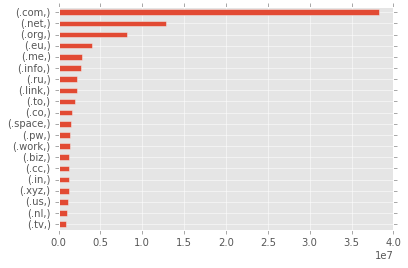

In [13]:
plt.style.use('ggplot')
df["Top_Level"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.savefig("top_level_domains.png")

## 3. Top copyright infringing Domains

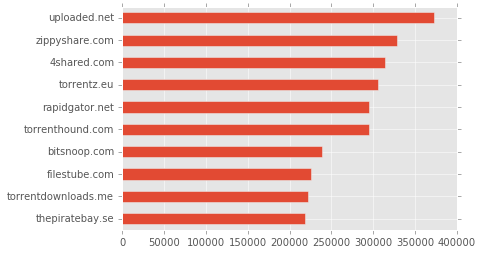

In [14]:
df["Domain"].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')
plt.savefig("top_domains.png")

## 4. Total, Removed, Not Removed, Pending

In [15]:
df['Request ID'].count()

111657904

In [16]:
df['URLs removed'].sum()

1535912645

In [17]:
df['URLs for which we took no action'].sum()

151726573

In [18]:
df['URLs pending review'].sum()

320678

## 5. .ch, .org & .edu

In [19]:
#com = df[df['Top_Level'] == '.com']

In [20]:
#pd.DataFrame(com).to_csv('com.csv', index=False)

In [21]:
df[df['Top_Level'] == '(.ch,)']
#pd.DataFrame(ch).to_csv('ch.csv', index=False)
#org = df[df['Top_Level'] == '(.org,)']
#edu = df[df['Top_Level'] == '(.edu,)']

,Request ID,Domain,URLs removed,URLs for which we took no action,URLs pending review,From Abuser,Top_Level


In [22]:
ch['Domain'].value_counts().sort_values(ascending=True)

NameError: name 'ch' is not defined